In [75]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d

import io
import warnings
warnings.filterwarnings('ignore')
sns.set(rc = {'figure.figsize':(15,8)})

%matplotlib inline

Dataset Accessible from: https://stats.oecd.org/index.aspx?DataSetCode=BLI

In [13]:
df = pd.read_csv("C:/Users/j.alexander1/Desktop/PYTHON/GeneralAssembly/PROJECTS/CAPSTONE/OECD.cl.csv")

In [14]:
df.isnull().values.any()

False

In [15]:
df.shape

(40, 25)

In [16]:
df.set_index('Country', drop=True, inplace=True)

In [17]:
df.head(10)

,Housing - Dwellings without basic facilities (%),Housing - Housing expenditure (%),Housing - Rooms per person (Ratio),Income - Household net adjusted disposable income (US $),Income - Household net wealth (US $),Jobs - Labour market insecurity (%),Jobs - Employment rate (%),Jobs - Long-term unemployment rate (%),Jobs - Personal earnings (US $),Community - Quality of support network (%),...,Environment - Water quality (%),Civic engagement - Stakeholder engagement for developing regulations (Average score),Civic engagement - Voter turnout (%),Health - Life expectancy in Years,Health - Self-reported health (%),Safety - Feeling safe walking alone at night (%),Safety - Homicide rate (Ratio),Work-Life Balance - Employees working very long hours (%),Work-Life Balance - Time devoted to leisure and personal care (Hours),Life Satisfaction - Life satisfaction (Average score)
Country,,,,,,,,,,,,,,,,,,,,,
Finland,0.4,23.1,1.9,33471,230032,2.2,72,1.2,46230,96,...,97,2.2,69,82.1,68,88,1.2,3.6,15.17,7.9
Iceland,0,..,1.6,..,..,1,78,0.7,67488,98,...,97,2.1,81,83.2,77,85,0.3,11.7,..,7.6
Denmark,0.5,23.3,1.9,33774,149864,4.5,74,0.9,58430,95,...,93,2,85,81.5,70,85,0.5,1.1,..,7.5
Netherlands,0.1,19.6,2,34984,248599,2.5,78,0.9,58828,94,...,91,2.6,79,82.2,75,83,0.6,0.3,15.45,7.5
Switzerland,0,21.4,1.9,39697,..,..,80,1.7,64824,94,...,96,2.3,45,84.0,81,86,0.3,0.4,..,7.5
Luxembourg,0.1,20.7,2,44773,941162,2.2,67,1.7,65854,91,...,85,1.7,90,82.7,72,87,0.2,2.8,..,7.4
Germany,0.1,20,1.8,38971,304317,1.4,77,1.2,53745,90,...,91,1.8,76,81.4,66,76,0.4,3.9,15.62,7.3
New Zealand,..,19.7,2.4,39024,514162,4.5,77,0.4,45269,95,...,85,2.5,82,82.1,86,66,1.3,14,14.87,7.3
Norway,0,17.7,2.1,39144,268358,2.8,75,0.9,55780,96,...,98,2.2,78,83.0,75,93,0.6,1.4,15.67,7.3


Null values present across multiple columns / rows of the dataset. I will impute a proxy value based on the KNN of a data point. 

In [18]:
df = df.replace('..',0)
df

,Housing - Dwellings without basic facilities (%),Housing - Housing expenditure (%),Housing - Rooms per person (Ratio),Income - Household net adjusted disposable income (US $),Income - Household net wealth (US $),Jobs - Labour market insecurity (%),Jobs - Employment rate (%),Jobs - Long-term unemployment rate (%),Jobs - Personal earnings (US $),Community - Quality of support network (%),...,Environment - Water quality (%),Civic engagement - Stakeholder engagement for developing regulations (Average score),Civic engagement - Voter turnout (%),Health - Life expectancy in Years,Health - Self-reported health (%),Safety - Feeling safe walking alone at night (%),Safety - Homicide rate (Ratio),Work-Life Balance - Employees working very long hours (%),Work-Life Balance - Time devoted to leisure and personal care (Hours),Life Satisfaction - Life satisfaction (Average score)
Country,,,,,,,,,,,,,,,,,,,,,
Finland,0.4,23.1,1.9,33471,230032,2.2,72,1.2,46230,96,...,97,2.2,69,82.1,68,88,1.2,3.6,15.17,7.9
Iceland,0,0,1.6,0,0,1,78,0.7,67488,98,...,97,2.1,81,83.2,77,85,0.3,11.7,0,7.6
Denmark,0.5,23.3,1.9,33774,149864,4.5,74,0.9,58430,95,...,93,2,85,81.5,70,85,0.5,1.1,0,7.5
Netherlands,0.1,19.6,2,34984,248599,2.5,78,0.9,58828,94,...,91,2.6,79,82.2,75,83,0.6,0.3,15.45,7.5
Switzerland,0,21.4,1.9,39697,0,0,80,1.7,64824,94,...,96,2.3,45,84.0,81,86,0.3,0.4,0,7.5
Luxembourg,0.1,20.7,2,44773,941162,2.2,67,1.7,65854,91,...,85,1.7,90,82.7,72,87,0.2,2.8,0,7.4
Germany,0.1,20,1.8,38971,304317,1.4,77,1.2,53745,90,...,91,1.8,76,81.4,66,76,0.4,3.9,15.62,7.3
New Zealand,0,19.7,2.4,39024,514162,4.5,77,0.4,45269,95,...,85,2.5,82,82.1,86,66,1.3,14,14.87,7.3
Norway,0,17.7,2.1,39144,268358,2.8,75,0.9,55780,96,...,98,2.2,78,83.0,75,93,0.6,1.4,15.67,7.3


In [19]:
df_two = df.astype('Float64')
df_two

,Housing - Dwellings without basic facilities (%),Housing - Housing expenditure (%),Housing - Rooms per person (Ratio),Income - Household net adjusted disposable income (US $),Income - Household net wealth (US $),Jobs - Labour market insecurity (%),Jobs - Employment rate (%),Jobs - Long-term unemployment rate (%),Jobs - Personal earnings (US $),Community - Quality of support network (%),...,Environment - Water quality (%),Civic engagement - Stakeholder engagement for developing regulations (Average score),Civic engagement - Voter turnout (%),Health - Life expectancy in Years,Health - Self-reported health (%),Safety - Feeling safe walking alone at night (%),Safety - Homicide rate (Ratio),Work-Life Balance - Employees working very long hours (%),Work-Life Balance - Time devoted to leisure and personal care (Hours),Life Satisfaction - Life satisfaction (Average score)
Country,,,,,,,,,,,,,,,,,,,,,
Finland,0.4,23.1,1.9,33471.0,230032.0,2.2,72.0,1.2,46230.0,96.0,...,97.0,2.2,69.0,82.1,68.0,88.0,1.2,3.6,15.17,7.9
Iceland,0.0,0.0,1.6,0.0,0.0,1.0,78.0,0.7,67488.0,98.0,...,97.0,2.1,81.0,83.2,77.0,85.0,0.3,11.7,0.0,7.6
Denmark,0.5,23.3,1.9,33774.0,149864.0,4.5,74.0,0.9,58430.0,95.0,...,93.0,2.0,85.0,81.5,70.0,85.0,0.5,1.1,0.0,7.5
Netherlands,0.1,19.6,2.0,34984.0,248599.0,2.5,78.0,0.9,58828.0,94.0,...,91.0,2.6,79.0,82.2,75.0,83.0,0.6,0.3,15.45,7.5
Switzerland,0.0,21.4,1.9,39697.0,0.0,0.0,80.0,1.7,64824.0,94.0,...,96.0,2.3,45.0,84.0,81.0,86.0,0.3,0.4,0.0,7.5
Luxembourg,0.1,20.7,2.0,44773.0,941162.0,2.2,67.0,1.7,65854.0,91.0,...,85.0,1.7,90.0,82.7,72.0,87.0,0.2,2.8,0.0,7.4
Germany,0.1,20.0,1.8,38971.0,304317.0,1.4,77.0,1.2,53745.0,90.0,...,91.0,1.8,76.0,81.4,66.0,76.0,0.4,3.9,15.62,7.3
New Zealand,0.0,19.7,2.4,39024.0,514162.0,4.5,77.0,0.4,45269.0,95.0,...,85.0,2.5,82.0,82.1,86.0,66.0,1.3,14.0,14.87,7.3
Norway,0.0,17.7,2.1,39144.0,268358.0,2.8,75.0,0.9,55780.0,96.0,...,98.0,2.2,78.0,83.0,75.0,93.0,0.6,1.4,15.67,7.3


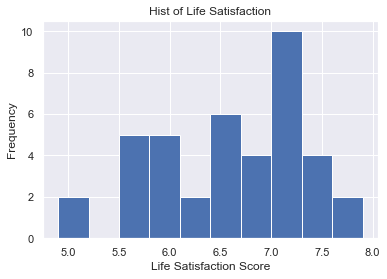

In [148]:
import matplotlib.pyplot as plt
df["Life Satisfaction - Life satisfaction (Average score)"].hist(bins=10)
plt.xlabel("Life Satisfaction Score")
plt.ylabel("Frequency")
plt.title("Hist of Life Satisfaction")
plt.show()

In [21]:
df_two.dtypes

Housing - Dwellings without basic facilities (%)                                        Float64
Housing -  Housing expenditure (%)                                                      Float64
Housing - Rooms per person (Ratio)                                                      Float64
Income -  Household net adjusted disposable income (US $)                               Float64
Income - Household net wealth (US $)                                                    Float64
Jobs - Labour market insecurity (%)                                                     Float64
Jobs - Employment rate (%)                                                              Float64
Jobs - Long-term unemployment rate (%)                                                  Float64
Jobs - Personal earnings (US $)                                                         Float64
Community - Quality of support network (%)                                              Float64
Education -  Educational attainment (%) 

## KNN Classification 

*Have removed the below as the end result was not accutally helpful for the model or end result. However, wish to show my working.* 

In [22]:
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import classification_report as cr
#from sklearn.neighbors import KNeighborsClassifier

In [23]:
#X = df_two
#Y = df[["Country"]]

In [24]:
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = .2, random_state = 42)

In [25]:
#scaler = StandardScaler()

#scaled_X_train = scaler.fit_transform(X_train)
#scaled_X_test = scaler.fit_transform(X_test)

In [26]:
#knn = KNeighborsClassifier(n_neighbors = 1)

In [27]:
#X_test

In [28]:
#knn.fit(scaled_X_train, Y_train)

#Y_pred = knn.predict(scaled_X_test)

In [29]:
#Y_pred

In [30]:
#from sklearn.metrics import classification_report,confusion_matrix

#print(classification_report(Y_test, Y_pred))

In [31]:
#knn.score(scaled_X_test, Y_test)

In [38]:
df = df.sort_values('Life Satisfaction - Life satisfaction (Average score)',ascending=False)
df

,Housing - Dwellings without basic facilities (%),Housing - Housing expenditure (%),Housing - Rooms per person (Ratio),Income - Household net adjusted disposable income (US $),Income - Household net wealth (US $),Jobs - Labour market insecurity (%),Jobs - Employment rate (%),Jobs - Long-term unemployment rate (%),Jobs - Personal earnings (US $),Community - Quality of support network (%),...,Environment - Water quality (%),Civic engagement - Stakeholder engagement for developing regulations (Average score),Civic engagement - Voter turnout (%),Health - Life expectancy in Years,Health - Self-reported health (%),Safety - Feeling safe walking alone at night (%),Safety - Homicide rate (Ratio),Work-Life Balance - Employees working very long hours (%),Work-Life Balance - Time devoted to leisure and personal care (Hours),Life Satisfaction - Life satisfaction (Average score)
Country,,,,,,,,,,,,,,,,,,,,,
Finland,0.4,23.1,1.9,33471,230032,2.2,72,1.2,46230,96,...,97,2.2,69,82.1,68,88,1.2,3.6,15.17,7.9
Iceland,0,0,1.6,0,0,1,78,0.7,67488,98,...,97,2.1,81,83.2,77,85,0.3,11.7,0,7.6
Denmark,0.5,23.3,1.9,33774,149864,4.5,74,0.9,58430,95,...,93,2,85,81.5,70,85,0.5,1.1,0,7.5
Netherlands,0.1,19.6,2,34984,248599,2.5,78,0.9,58828,94,...,91,2.6,79,82.2,75,83,0.6,0.3,15.45,7.5
Switzerland,0,21.4,1.9,39697,0,0,80,1.7,64824,94,...,96,2.3,45,84.0,81,86,0.3,0.4,0,7.5
Luxembourg,0.1,20.7,2,44773,941162,2.2,67,1.7,65854,91,...,85,1.7,90,82.7,72,87,0.2,2.8,0,7.4
Germany,0.1,20,1.8,38971,304317,1.4,77,1.2,53745,90,...,91,1.8,76,81.4,66,76,0.4,3.9,15.62,7.3
New Zealand,0,19.7,2.4,39024,514162,4.5,77,0.4,45269,95,...,85,2.5,82,82.1,86,66,1.3,14,14.87,7.3
Norway,0,17.7,2.1,39144,268358,2.8,75,0.9,55780,96,...,98,2.2,78,83.0,75,93,0.6,1.4,15.67,7.3


Text(0.5, 1.0, 'Income vs Satisfaction')

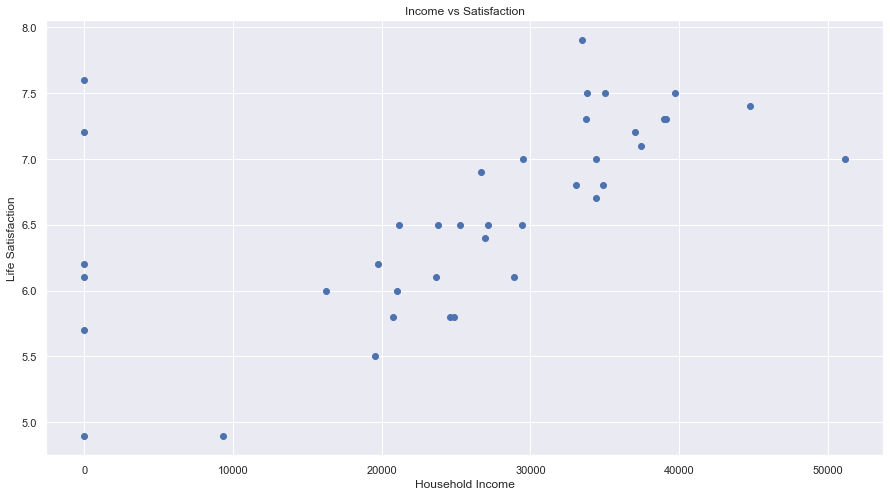

In [39]:
plt.scatter(df_two['Income -  Household net adjusted disposable income (US $)'], df_two['Life Satisfaction - Life satisfaction (Average score)'])
plt.xlabel("Household Income")
plt.ylabel("Life Satisfaction")
plt.title("Income vs Satisfaction")

Text(0.5, 1.0, 'Facilities vs Satisfaction')

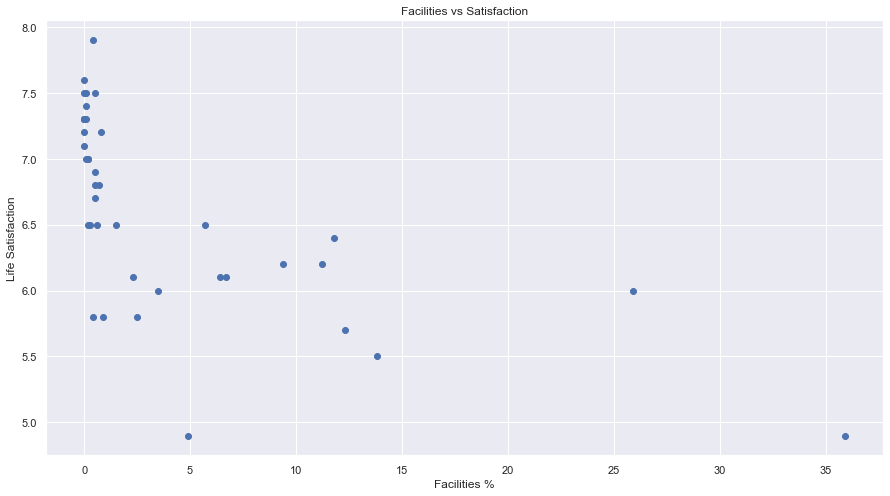

In [40]:
plt.scatter(df_two['Housing - Dwellings without basic facilities (%)'], df_two['Life Satisfaction - Life satisfaction (Average score)'])
plt.xlabel("Facilities %")
plt.ylabel("Life Satisfaction")
plt.title("Facilities vs Satisfaction")

<AxesSubplot:>

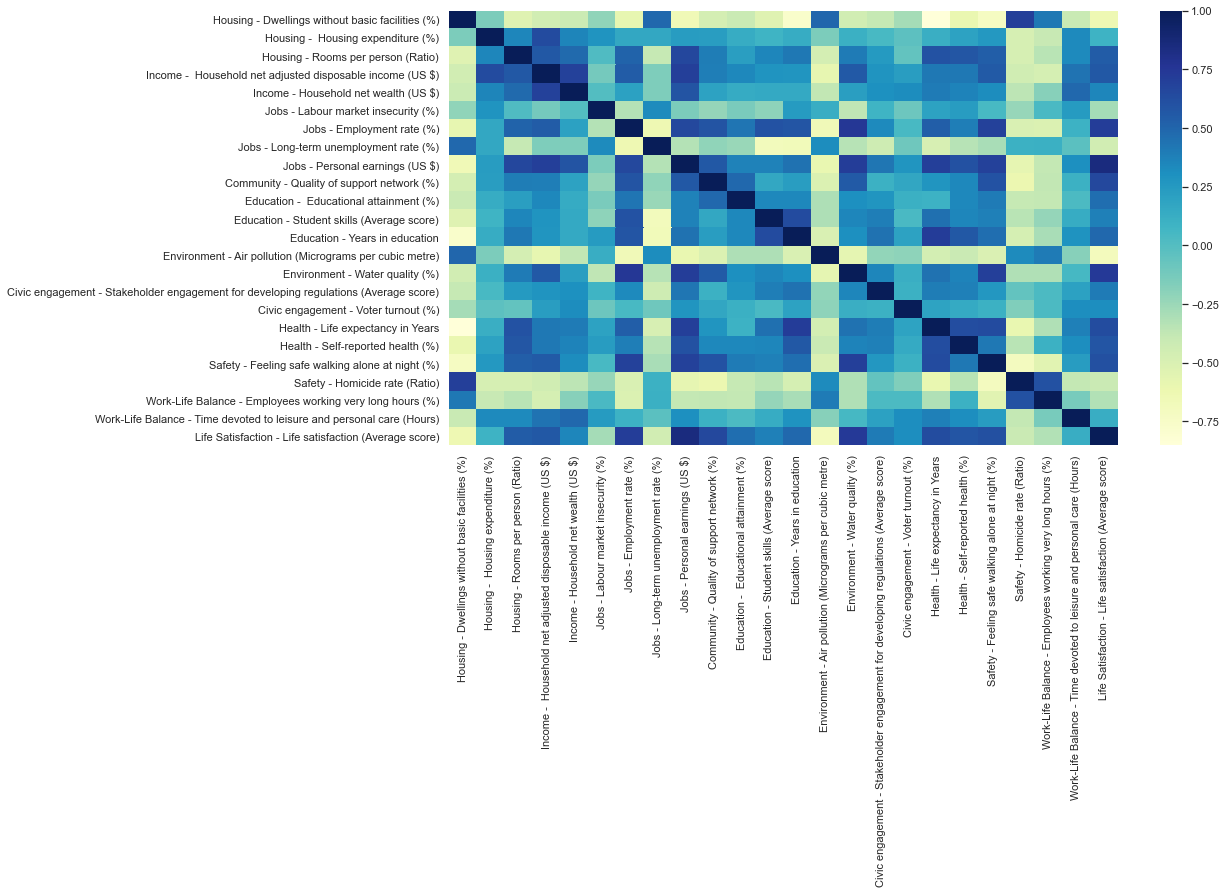

In [41]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_two.corr(), cmap="YlGnBu")

In [42]:
df.isnull().values.any()

False

In [45]:
X = df

In [46]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [135]:
km = KMeans(n_clusters=5, random_state=1).fit(X_scaled)

km

KMeans(n_clusters=5, random_state=1)

In [136]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 3, 1, 2, 2, 3, 2, 1, 4])

In [137]:
df_two["cluster"] = km.labels_
df = df_two.sort_values(['cluster'],ascending=True)
df

,Housing - Dwellings without basic facilities (%),Housing - Housing expenditure (%),Housing - Rooms per person (Ratio),Income - Household net adjusted disposable income (US $),Income - Household net wealth (US $),Jobs - Labour market insecurity (%),Jobs - Employment rate (%),Jobs - Long-term unemployment rate (%),Jobs - Personal earnings (US $),Community - Quality of support network (%),...,Civic engagement - Stakeholder engagement for developing regulations (Average score),Civic engagement - Voter turnout (%),Health - Life expectancy in Years,Health - Self-reported health (%),Safety - Feeling safe walking alone at night (%),Safety - Homicide rate (Ratio),Work-Life Balance - Employees working very long hours (%),Work-Life Balance - Time devoted to leisure and personal care (Hours),Life Satisfaction - Life satisfaction (Average score),cluster
Country,,,,,,,,,,,,,,,,,,,,,
Finland,0.4,23.1,1.9,33471.0,230032.0,2.2,72.0,1.2,46230.0,96.0,...,2.2,69.0,82.1,68.0,88.0,1.2,3.6,15.17,7.9,0
United Kingdom,0.5,23.2,2.0,33049.0,524422.0,3.3,75.0,0.9,47147.0,93.0,...,3.1,68.0,81.3,73.0,78.0,0.2,10.8,14.94,6.8,0
Belgium,0.7,20.0,2.1,34884.0,447607.0,2.4,65.0,2.3,54327.0,90.0,...,2.0,88.0,82.1,74.0,56.0,1.1,4.3,15.52,6.8,0
United States,0.1,18.3,2.4,51147.0,684500.0,4.2,67.0,0.5,69392.0,94.0,...,3.1,65.0,78.9,88.0,78.0,6.0,10.4,14.57,7.0,0
Ireland,0.2,20.6,2.1,29488.0,370341.0,2.6,68.0,1.2,49474.0,96.0,...,1.3,63.0,82.8,84.0,76.0,0.5,4.7,14.54,7.0,0
Canada,0.2,22.9,2.6,34421.0,478240.0,3.8,70.0,0.5,55342.0,93.0,...,2.9,68.0,82.1,89.0,78.0,1.2,3.3,14.57,7.0,0
Australia,0.0,19.4,0.0,37433.0,528768.0,3.1,73.0,1.0,55206.0,93.0,...,2.7,92.0,83.0,85.0,67.0,0.9,12.5,14.36,7.1,0
Austria,0.8,20.8,1.6,37001.0,309637.0,2.3,72.0,1.3,53132.0,92.0,...,1.3,76.0,82.0,71.0,86.0,0.5,5.3,14.51,7.2,0
Sweden,0.0,20.1,1.7,33730.0,0.0,4.4,75.0,1.0,47020.0,94.0,...,2.0,87.0,83.2,76.0,79.0,1.1,0.9,0.0,7.3,0


In [52]:
df.to_csv("C:/Users/j.alexander1/Desktop/PYTHON/GeneralAssembly/PROJECTS/CAPSTONE/OECD.final.csv")

In [53]:
#df.sort_values([' Life Satisfaction - Life satisfaction (Average score)'],ascending=False)
#df.sort_values(['cluster'],ascending=False)
df.loc[df['cluster']==0]

,Housing - Dwellings without basic facilities (%),Housing - Housing expenditure (%),Housing - Rooms per person (Ratio),Income - Household net adjusted disposable income (US $),Income - Household net wealth (US $),Jobs - Labour market insecurity (%),Jobs - Employment rate (%),Jobs - Long-term unemployment rate (%),Jobs - Personal earnings (US $),Community - Quality of support network (%),...,Civic engagement - Stakeholder engagement for developing regulations (Average score),Civic engagement - Voter turnout (%),Health - Life expectancy in Years,Health - Self-reported health (%),Safety - Feeling safe walking alone at night (%),Safety - Homicide rate (Ratio),Work-Life Balance - Employees working very long hours (%),Work-Life Balance - Time devoted to leisure and personal care (Hours),Life Satisfaction - Life satisfaction (Average score),cluster
Country,,,,,,,,,,,,,,,,,,,,,
Finland,0.4,23.1,1.9,33471.0,230032.0,2.2,72.0,1.2,46230.0,96.0,...,2.2,69.0,82.1,68.0,88.0,1.2,3.6,15.17,7.9,0
United Kingdom,0.5,23.2,2.0,33049.0,524422.0,3.3,75.0,0.9,47147.0,93.0,...,3.1,68.0,81.3,73.0,78.0,0.2,10.8,14.94,6.8,0
Belgium,0.7,20.0,2.1,34884.0,447607.0,2.4,65.0,2.3,54327.0,90.0,...,2.0,88.0,82.1,74.0,56.0,1.1,4.3,15.52,6.8,0
United States,0.1,18.3,2.4,51147.0,684500.0,4.2,67.0,0.5,69392.0,94.0,...,3.1,65.0,78.9,88.0,78.0,6.0,10.4,14.57,7.0,0
Ireland,0.2,20.6,2.1,29488.0,370341.0,2.6,68.0,1.2,49474.0,96.0,...,1.3,63.0,82.8,84.0,76.0,0.5,4.7,14.54,7.0,0
Canada,0.2,22.9,2.6,34421.0,478240.0,3.8,70.0,0.5,55342.0,93.0,...,2.9,68.0,82.1,89.0,78.0,1.2,3.3,14.57,7.0,0
Australia,0.0,19.4,0.0,37433.0,528768.0,3.1,73.0,1.0,55206.0,93.0,...,2.7,92.0,83.0,85.0,67.0,0.9,12.5,14.36,7.1,0
Austria,0.8,20.8,1.6,37001.0,309637.0,2.3,72.0,1.3,53132.0,92.0,...,1.3,76.0,82.0,71.0,86.0,0.5,5.3,14.51,7.2,0
Sweden,0.0,20.1,1.7,33730.0,0.0,4.4,75.0,1.0,47020.0,94.0,...,2.0,87.0,83.2,76.0,79.0,1.1,0.9,0.0,7.3,0


## Cluster [0] Developed / Rich Economies with high income, wealth and employment

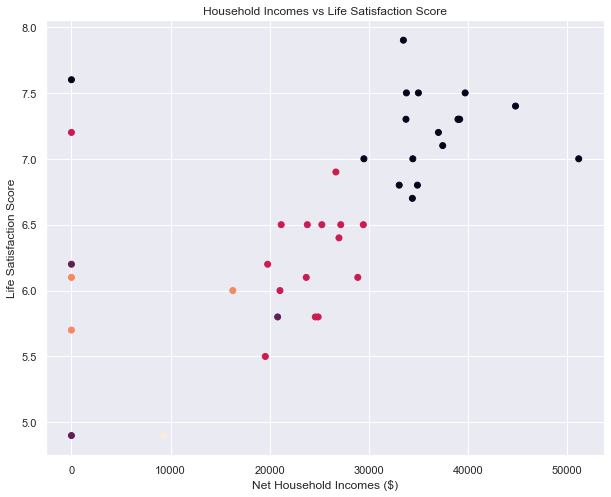

In [149]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Income -  Household net adjusted disposable income (US $)'], df['Life Satisfaction - Life satisfaction (Average score)'], c=df['cluster'])
plt.xlabel("Net Household Incomes ($)")
plt.ylabel("Life Satisfaction Score")
plt.title("Household Incomes vs Life Satisfaction Score") 
plt.show()

**Cluster [0]** Economic factors mainly underlie the high 'life' satisfaction score for 0 cluster (rich and developed economies of Europe + North America), with highest levels of income, wealth and long-term employment

## Cluster [1] Chile, Turkey and Greece (Outlier States?)

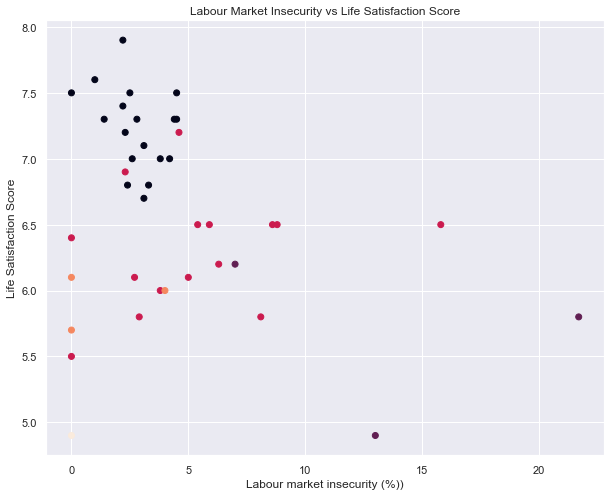

In [152]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Jobs - Labour market insecurity (%)'], df['Life Satisfaction - Life satisfaction (Average score)'], c=df['cluster'])
plt.xlabel("Labour market insecurity (%))")
plt.ylabel("Life Satisfaction Score")
plt.title("Labour Market Insecurity vs Life Satisfaction Score") 
plt.show()

**Cluster [1]** Cluster is mainly characterised by high labour market insecurity and high relative housing expenditure, Chile is added into this cluster as its % housing expenditure is broadly in line with Greece and Turkey (though its labour insecurity is significantly lower). 

## Cluster [3] South America (without Chile)

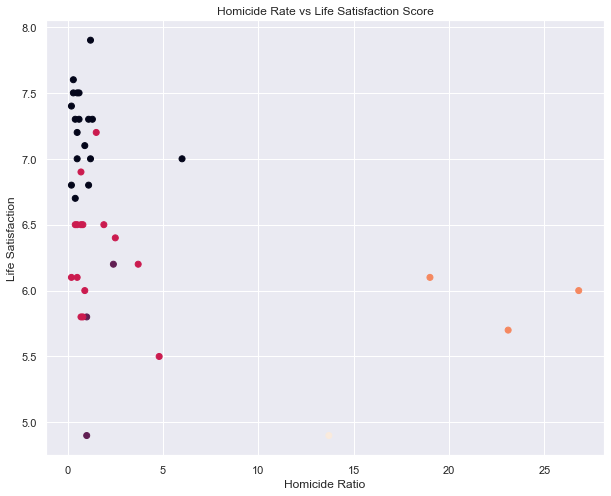

In [127]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Safety - Homicide rate (Ratio)'], df['Life Satisfaction - Life satisfaction (Average score)'], c=df['cluster'])
plt.xlabel("Homicide Ratio")
plt.ylabel("Life Satisfaction Score")
plt.title("Homicide Rate vs Life Satisfaction Score") 
plt.show()

**Cluster [3]** Massive outliers interms of proportional homicide rates. Chile has a homicdie rate of 2.4, so despite being in the same region, bears little relation to the social issues affecting Brazil, Columbia and Mexico. 

## Cluster [4] South Africa

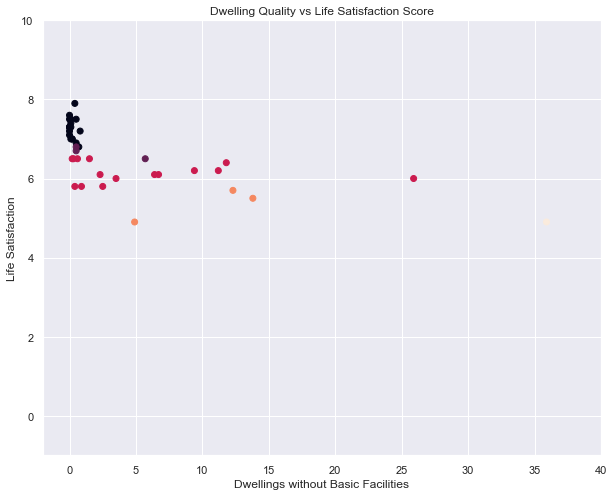

In [167]:
plt.figure(figsize=(10, 8))
plt.scatter(df_two['Housing - Dwellings without basic facilities (%)'], df_two['Life Satisfaction - Life satisfaction (Average score)'], c=df['cluster'])
plt.ylim( [ -1, 10] )          
plt.xlim( [ -2, 40 ] ) 
plt.xlabel("Dwellings without Basic Facilities")
plt.ylabel("Life Satisfaction")
plt.title("Dwelling Quality vs Life Satisfaction Score") 
plt.show()

**Cluster [4]**
South Africa, main outlier in poor housing facilities

## Cluster [2] Median Group

This cluster includes many eastern and southern Europeon States + Korea, Japan and Israel. 

Somewhat of 'problem' cluster, lot of variance in it's grouping across the features.
However, income, wealth, education and employment rates are relatively consitent across the cluster. 

Main outliers in terms of countrys are: Japan, Korea, Israel. 

Explanation: 
Israel had a number of 'null' values in the raw set, replaced with '0' this may have affected it's clustering into cluster 2 (especially in model-sensitive areas like income and wealth). Hypothesis is backed up by it's life satisfaction score in of 7.2, indicating it must be a 'higher income/wealth' country. 

Korea and Japan are massively underporting their health (with 34% and 36% respectively), see below:

**Cluster [2] - Potential Missclassfication of Japan and Korea** 

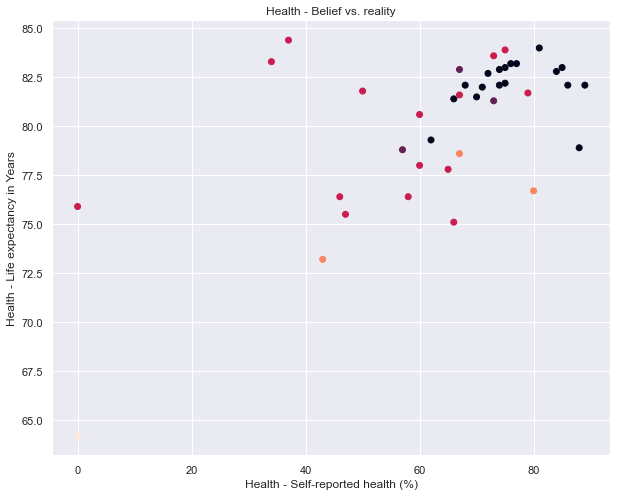

In [74]:
plt.figure(figsize=(10, 8))
plt.scatter(df_two['Health - Self-reported health (%)'], df_two['Health - Life expectancy in Years'], c=df['cluster'])
plt.xlabel("Health - Self-reported health (%)")
plt.ylabel("Health - Life expectancy in Years")
plt.title("Health - Belief vs. reality")
plt.show()

**Cluster [2]**
Japan (84) & Korea (83) have very low 'Health - Self-reported health (%)' which is interesting as I thought they were one of the healthiest pair of nations?

In [138]:
df['cluster'].value_counts()

0    18
2    15
1     3
3     3
4     1
Name: cluster, dtype: int64

In [139]:
km.cluster_centers_

array([[-5.13336643e-01,  1.95399865e-01,  5.69069665e-01,
         7.14019000e-01,  5.42256163e-01, -3.72633377e-01,
         5.43776463e-01, -2.75524273e-01,  8.70457369e-01,
         5.34583583e-01,  3.55717726e-01,  3.40488444e-01,
         3.28895804e-01, -7.06256297e-01,  6.46789078e-01,
         2.25501589e-01,  5.42467915e-01,  5.18847760e-01,
         6.09107535e-01,  4.54987500e-01, -3.50941213e-01,
        -1.41017611e-01,  3.46264070e-01,  8.64808592e-01],
       [ 1.18879148e-01,  2.21996553e-01, -2.99952976e-01,
        -1.39277461e+00, -6.60616091e-01,  2.19685307e+00,
        -1.70901174e+00,  8.43517296e-01, -1.04971733e+00,
        -1.41130066e+00, -8.09034679e-01, -9.67943736e-02,
         4.19750998e-01,  1.29777214e+00, -2.01595480e+00,
        -7.13134466e-01, -4.67518683e-01,  1.17033329e-02,
         2.13965311e-01, -1.19252062e+00, -2.68854976e-01,
         8.77625318e-01,  2.11992975e-01, -1.34615345e+00],
       [ 7.78980171e-03,  1.03598391e-01, -1.65394632e

In [147]:
centers = df_two.groupby(["cluster"]).mean()
centers

centers.to_csv("C:/Users/j.alexander1/Desktop/PYTHON/GeneralAssembly/PROJECTS/CAPSTONE/OECD.centres_new.csv") 

In [141]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

In [142]:
sse

[1822848917656.0723,
 721141412651.5051,
 311697889664.86707,
 153602349437.31323,
 84238273962.22783,
 55948567547.76591,
 35137260962.44625,
 26889754175.12517,
 20488563578.910725]

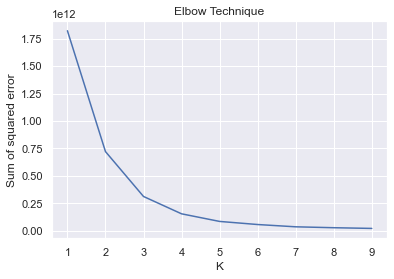

In [146]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title("Elbow Technique")
plt.plot(k_rng,sse)
plt.show()